In [230]:
import os
from scipy import stats
import pandas as pd
import numpy as np

In [231]:
odir="/mnt/lab_data2/anusri/variant-scorer/src/output/CAGI/output/"
dirs = os.listdir(odir)

enformer = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer/allGroupsBenchmark.txt", sep="\t", header=0)
enformer.head()

,Locus,deltaSVM,Enf.CAGE.Agnostic,Enf.CAGE,Enf.DNase.Agnostic,Enf.DNase,Enformer,G3,G7,dSVM LASSO,dSVM RF,dSVM (1 DHS),G5,CADD,Inter-replicate
0,F9,0.483518,0.245,0.252,0.573,0.291,0.572,0.624,0.391,0.557,0.566,0.489,0.564,-0.086,0.88
1,GP1BB,NaN,0.370,0.469,0.555,0.564,0.563,0.556,0.566,0.261,0.371,0.421,0.348,-0.083,0.88
2,HBB,NaN,0.491,0.596,0.550,0.578,0.600,0.446,0.416,0.445,0.328,0.393,0.392,0.049,0.77
3,HBG1,NaN,0.178,0.302,0.104,0.189,0.474,0.571,0.591,0.397,0.439,0.342,0.479,0.174,0.92
4,HNF4A,0.091578,0.173,0.156,0.170,0.288,0.335,0.339,0.397,0.225,0.151,0.134,0.191,0.111,0.89


,Locus,deltaSVM,Enf.CAGE.Agnostic,Enf.CAGE,Enf.DNase.Agnostic,Enf.DNase,Enformer,G3,G7,dSVM LASSO,dSVM RF,dSVM (1 DHS),G5,CADD,Inter-replicate
0,F9,0.483518,0.245,0.252,0.573,0.291,0.572,0.624,0.391,0.557,0.566,0.489,0.564,-0.086,0.88
1,GP1BB,NaN,0.370,0.469,0.555,0.564,0.563,0.556,0.566,0.261,0.371,0.421,0.348,-0.083,0.88
2,HBB,NaN,0.491,0.596,0.550,0.578,0.600,0.446,0.416,0.445,0.328,0.393,0.392,0.049,0.77
3,HBG1,NaN,0.178,0.302,0.104,0.189,0.474,0.571,0.591,0.397,0.439,0.342,0.479,0.174,0.92
4,HNF4A,0.091578,0.173,0.156,0.170,0.288,0.335,0.339,0.397,0.225,0.151,0.134,0.191,0.111,0.89


In [10]:
cagi_df_list = []

for idir in dirs: 
    idir=str(idir)
    ifile=odir+idir+"/summary.mean.variant_scores_new_2.tsv"
    if os.path.isfile(ifile):
        if not ifile.endswith("tsv"):
            continue
        data = pd.read_csv(ifile, sep="\t", header=0)
        #print(data.head())
        data[["chr_temp", "pos_temp", "ref_temp", "alt_temp", "label", "Confidence", "challenge"]] = data["rsid"].str.split(",", expand=True)
        #print(data.columns)
        data["sign_jsd.mean"] = data["jsd.mean"] * np.sign(data["logfc.mean"])
        data["model_used"] = idir
        data = data[['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean', "sign_jsd.mean", 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', "label", "Confidence", "challenge", "model_used"]]
        cagi_df_list.append(data)

cagi_df = pd.concat(cagi_df_list)

In [11]:
cagi_df.head()

,chr,pos,allele1,allele2,rsid,logfc.mean,sign_jsd.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,label,Confidence,challenge,model_used
0,chr6,37775290,G,A,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv",-0.143521,-0.024822,0.044314,0.038392,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
1,chr6,37775290,G,C,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv",-0.131439,-0.023676,0.040458,0.041713,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
2,chr6,37775290,G,T,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv",-0.086450,-0.023025,0.026278,0.065491,0.07,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
3,chr6,37775291,T,A,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv",-0.013275,-0.027508,0.011885,0.166936,-0.07,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
4,chr6,37775291,T,C,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv",0.033312,0.020898,0.011562,0.171765,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas


In [ ]:
# get enformer preds
# first get enformer preds with hg19 coords


In [12]:
odir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/data/"
dirs = os.listdir(odir)

In [1]:
enf_dfs= []
for idir in dirs:
    idir=str(idir)
    ifile=odir+idir
    if os.path.isfile(ifile):
            #print(ifile)
#             if idir in ["challenge_MSMB.tsv"]: # MSMB ref and alt also dont match
#                 continue
            if not ifile.endswith("tsv"):
                continue
            if not idir.startswith("challenge"):
                continue
            print(idir)
            orig = pd.read_csv(ifile, sep="\t", header=None, comment="#")
            orig[0] = "chr"+orig[0].astype(str)
            orig.columns = ["chr_hg19", "pos_hg19", "ref", "alt", "label", "Confidence"]
            ifile1 = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/CAGI5_train_test_hg19_to_hg38_liftover/"
            liftoverd = ifile1 + "withChr."+idir
            lft_data = pd.read_csv(liftoverd, sep="\t", header=None)
            lft_data.columns = ["chr_hg38", "pos_hg38", "ref_hg38", "alt_hg38", "label_hg38", "Confidence_hg38"]
            assert(lft_data.shape[0]==orig.shape[0])
            
            combined = pd.concat([orig, lft_data],axis=1)
            #print(combined.head())
            
#             assert((combined["ref"]==combined["ref_hg38"]).all())
#             assert((combined["alt"]==combined["alt_hg38"]).all())
            assert((combined["label"]==combined["label_hg38"]).all())
            assert((combined["Confidence"]==combined["Confidence_hg38"]).all())
            
            enf_f = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/"+idir.replace("challenge_","").replace(".tsv","")+".ZigaDataLocal.csv"
            enf_f = pd.read_csv(enf_f, sep=",", header=0)
            print(enf_h,head(1))
            #print(combined.drop_duplicates().shape[0], combined.shape[0])
            #print(enf_f.head(1))
            #assert(enf_f.shape[0] == combined.shape[0])
            #combined[["chr_hg19", "pos_hg19", "chr_hg38", "pos_hg38", "ref", "alt", "label", "Confidence"]]
            #print(enf_f.columns)
            #enf_with_orig = combined.merge(enf_f, right_on=["data.Position", "data.Value"], left_on=["pos_hg38", "label"], how="left")
            #enf_with_orig["challenge"] = idir
            #print(enf_with_orig.shape)
            #print(sum(~np.isnan(enf_with_orig["data.Value"])))
            enf_dfs.append(combined)
            

NameError: name 'dirs' is not defined

In [216]:
enf_df = pd.concat(enf_dfs)

In [217]:
enf_df

,chr_hg19,pos_hg19,ref,alt,label,Confidence,chr_hg38,pos_hg38,ref_hg38,alt_hg38,label_hg38,Confidence_hg38
0,chr11,5271035,G,A,0.19,0.06,chr11,5249805,G,A,0.19,0.06
1,chr11,5271035,G,C,0.07,0.01,chr11,5249805,G,C,0.07,0.01
2,chr11,5271035,G,T,-0.72,0.05,chr11,5249805,G,T,-0.72,0.05
3,chr11,5271036,G,A,0.14,0.04,chr11,5249806,G,A,0.14,0.04
4,chr11,5271036,G,C,0.09,0.00,chr11,5249806,G,C,0.09,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
864,chr22,19711172,G,A,-0.02,0.01,chr22,19723649,G,A,-0.02,0.01
865,chr22,19711172,G,C,0.02,0.00,chr22,19723649,G,C,0.02,0.00
866,chr22,19711172,G,T,0.09,0.01,chr22,19723649,G,T,0.09,0.01
867,chr22,19711173,T,C,0.00,0.00,chr22,19723650,T,C,0.00,0.00


In [218]:
import matplotlib.pyplot as plt

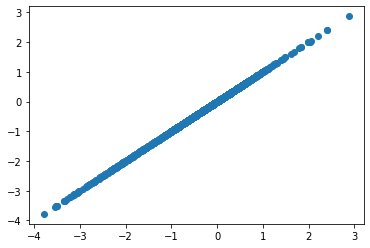

In [219]:
plt.scatter(enf_df["label"],enf_df["label_hg38"])

,chr_hg19,pos_hg19,ref,alt,label,Confidence,chr_hg38,pos_hg38,ref_hg38,alt_hg38,label_hg38,Confidence_hg38,data.Value,dnase,data.Position,challenge
0,chr11,5271035,G,A,0.19,0.06,chr11,5249805,G,A,0.19,0.06,0.19,-0.069240,5249805.0,challenge_HBG1.tsv
1,chr11,5271035,G,C,0.07,0.01,chr11,5249805,G,C,0.07,0.01,0.07,0.011861,5249805.0,challenge_HBG1.tsv
2,chr11,5271035,G,T,-0.72,0.05,chr11,5249805,G,T,-0.72,0.05,-0.72,0.035393,5249805.0,challenge_HBG1.tsv
3,chr11,5271036,G,A,0.14,0.04,chr11,5249806,G,A,0.14,0.04,0.14,-0.174114,5249806.0,challenge_HBG1.tsv
4,chr11,5271036,G,C,0.09,0.00,chr11,5249806,G,C,0.09,0.00,0.09,0.010160,5249806.0,challenge_HBG1.tsv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,chr22,19711172,G,A,-0.02,0.01,chr22,19723649,G,A,-0.02,0.01,-0.02,0.267801,19723649.0,challenge_GP1BB.tsv
909,chr22,19711172,G,C,0.02,0.00,chr22,19723649,G,C,0.02,0.00,0.02,0.337786,19723649.0,challenge_GP1BB.tsv
910,chr22,19711172,G,T,0.09,0.01,chr22,19723649,G,T,0.09,0.01,0.09,0.458304,19723649.0,challenge_GP1BB.tsv
911,chr22,19711173,T,C,0.00,0.00,chr22,19723650,T,C,0.00,0.00,0.00,0.487951,19723650.0,challenge_GP1BB.tsv


In [95]:
enf_df["label"] = enf_df["label"].astype(float)
enf_df["Confidence"] = enf_df["Confidence"].astype(float)
cagi_df["label"] = cagi_df["label"].astype(float)
cagi_df["Confidence"] = cagi_df["Confidence"].astype(float)
enf_df["pos_hg19"] = enf_df["pos_hg19"].astype(int)
cagi_df["pos"] = cagi_df["pos"].astype(int)

cagi_df_new = cagi_df.merge(enf_df, left_on=["chr", "pos", "allele1", "allele2", "label", "Confidence", "challenge"], right_on=["chr_hg19", "pos_hg19", "ref", "alt", "label", "Confidence", "challenge"], how="left", validate="many_to_one")


MergeError: Merge keys are not unique in right dataset; not a many-to-one merge

In [96]:
cagi_df_new.shape

(81883, 27)

In [97]:
cagi_df.shape

(28422, 13)

In [98]:
enf_df.shape

(13171, 16)

In [143]:
temp=enf_df.sort_values(["chr_hg19", "pos_hg19", "ref", "alt", "label", "Confidence", "challenge"])



In [145]:
temp[temp[["chr_hg19", "pos_hg19", "ref", "alt", "label", "Confidence", "challenge"]].duplicated(keep=False)]

,chr_hg19,pos_hg19,ref,alt,label,Confidence,chr_hg38,pos_hg38,ref_hg38,alt_hg38,label_hg38,Confidence_hg38,data.Value,dnase,data.Position,challenge
5,chr1,109817275,A,C,0.03,0.00,chr1,109274653,A,C,0.03,0.00,0.03,-0.120252,109274653.0,challenge_SORT1.tsv
6,chr1,109817275,A,C,0.03,0.00,chr1,109274653,A,C,0.03,0.00,0.03,-0.148276,109274653.0,challenge_SORT1.tsv
7,chr1,109817275,A,G,0.03,0.00,chr1,109274653,A,G,0.03,0.00,0.03,-0.120252,109274653.0,challenge_SORT1.tsv
8,chr1,109817275,A,G,0.03,0.00,chr1,109274653,A,G,0.03,0.00,0.03,-0.148276,109274653.0,challenge_SORT1.tsv
14,chr1,109817277,C,G,0.02,0.01,chr1,109274655,C,G,0.02,0.01,0.02,0.582183,109274655.0,challenge_SORT1.tsv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,chrX,138612868,T,G,-0.16,0.01,chrX,139530709,T,G,-0.16,0.01,-0.16,-2.321797,139530709.0,challenge_F9.tsv
633,chrX,138612869,G,A,-0.12,0.10,chrX,139530710,G,A,-0.12,0.10,-0.12,-3.545758,139530710.0,challenge_F9.tsv
634,chrX,138612869,G,A,-0.12,0.10,chrX,139530710,G,A,-0.12,0.10,-0.12,-3.537784,139530710.0,challenge_F9.tsv
636,chrX,138612869,G,T,-0.12,0.01,chrX,139530710,G,T,-0.12,0.01,-0.12,-3.545758,139530710.0,challenge_F9.tsv


In [ ]:
enf_df

In [141]:
dft

,chr_hg19,pos_hg19,ref,alt,label,Confidence,challenge
5,chr1,109817275,A,C,0.03,0.00,challenge_SORT1.tsv
6,chr1,109817275,A,C,0.03,0.00,challenge_SORT1.tsv
7,chr1,109817275,A,G,0.03,0.00,challenge_SORT1.tsv
8,chr1,109817275,A,G,0.03,0.00,challenge_SORT1.tsv
14,chr1,109817277,C,G,0.02,0.01,challenge_SORT1.tsv
...,...,...,...,...,...,...,...
632,chrX,138612868,T,G,-0.16,0.01,challenge_F9.tsv
633,chrX,138612869,G,A,-0.12,0.10,challenge_F9.tsv
634,chrX,138612869,G,A,-0.12,0.10,challenge_F9.tsv
636,chrX,138612869,G,T,-0.12,0.01,challenge_F9.tsv


In [132]:
temp[["chr_hg19", "pos_hg19", "ref", "alt", "label", "Confidence", "challenge"]]

,chr_hg19,pos_hg19,ref,alt,label,Confidence,challenge
0,chr1,109817273,C,A,-0.23,0.02,challenge_SORT1.tsv
1,chr1,109817273,C,G,-0.07,0.01,challenge_SORT1.tsv
2,chr1,109817274,G,A,-0.05,0.01,challenge_SORT1.tsv
3,chr1,109817274,G,C,0.06,0.01,challenge_SORT1.tsv
4,chr1,109817274,G,T,0.04,0.01,challenge_SORT1.tsv
...,...,...,...,...,...,...,...
702,chrX,138612907,A,G,-0.13,0.02,challenge_F9.tsv
703,chrX,138612907,A,T,-0.02,0.01,challenge_F9.tsv
704,chrX,138612908,T,A,-0.13,0.08,challenge_F9.tsv
705,chrX,138612908,T,C,-0.12,0.01,challenge_F9.tsv


In [146]:
import deepdish as dd

In [148]:
datat = dd.io.load("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/sad.h5")

In [150]:
datat["pos"].shape

(39170,)

In [170]:
datat['pos'].shape

(39170,)

In [171]:
datat.keys()

dict_keys(['SAD', 'SADR', 'SADR_pct', 'SAD_pct', 'alt_allele', 'chr', 'percentiles', 'pos', 'ref_allele', 'snp', 'target_ids', 'target_labels'])

In [194]:
enformer_preds = pd.DataFrame()

enformer_preds["chr"] = datat["chr"].astype(str)
enformer_preds["pos"] = datat["pos"]
enformer_preds["ref"] = datat["ref_allele"].astype(str)
enformer_preds["alt"] = datat["alt_allele"].astype(str)

enformer_preds["rsid"] = enformer_preds["chr"].astype(str) + '_' +  enformer_preds["pos"].astype(str) + "_" + enformer_preds["ref"] + '_' +  enformer_preds["alt"]



In [195]:
enformer_preds

,chr,pos,ref,alt,rsid
0,chr2,60494940,C,A,chr2_60494940_C_A
1,chr2,60494940,C,G,chr2_60494940_C_G
2,chr2,60494940,C,T,chr2_60494940_C_T
3,chr2,60494941,C,A,chr2_60494941_C_A
4,chr2,60494941,C,G,chr2_60494941_C_G
...,...,...,...,...,...
39165,chr7,156791602,G,C,chr7_156791602_G_C
39166,chr7,156791602,G,T,chr7_156791602_G_T
39167,chr7,156791603,C,A,chr7_156791603_C_A
39168,chr7,156791603,C,G,chr7_156791603_C_G


In [196]:
cagi_df

,chr,pos,allele1,allele2,rsid,logfc.mean,sign_jsd.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,label,Confidence,challenge,model_used
0,chr6,37775290,G,A,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv",-0.143521,-0.024822,0.044314,0.038392,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
1,chr6,37775290,G,C,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv",-0.131439,-0.023676,0.040458,0.041713,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
2,chr6,37775290,G,T,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv",-0.086450,-0.023025,0.026278,0.065491,0.07,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
3,chr6,37775291,T,A,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv",-0.013275,-0.027508,0.011885,0.166936,-0.07,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
4,chr6,37775291,T,C,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv",0.033312,0.020898,0.011562,0.171765,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,chr6,37775848,G,C,"6,37775848,G,C,0.19,0.03,challenge_ZFAND3.tsv",0.012688,0.011428,0.006799,0.309386,0.19,0.03,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas
1243,chr6,37775848,G,T,"6,37775848,G,T,0.02,0.0,challenge_ZFAND3.tsv",-0.014364,-0.010755,0.008316,0.339582,0.02,0.00,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas
1244,chr6,37775849,C,A,"6,37775849,C,A,0.0,0.0,challenge_ZFAND3.tsv",-0.009251,-0.012372,0.007680,0.323677,0.00,0.00,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas
1245,chr6,37775849,C,G,"6,37775849,C,G,-0.02,0.01,challenge_ZFAND3.tsv",0.007366,0.012662,0.004491,0.411898,-0.02,0.01,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas


In [200]:
enformer_labesls[enformer_labesls["encode_id"] == "ENCSR539WBA"]

,index,genome,identifier,file,clip,scale,sum_stat,description,encode_id


In [201]:
enformer_labesls["encode_id"]

0       ENCSR000EIJ
1       ENCSR000EIK
2       ENCSR000EIL
3       ENCSR000EIP
4       ENCSR000EIS
           ...     
5308      CNhs14239
5309      CNhs14240
5310      CNhs14241
5311      CNhs14244
5312      CNhs14245
Name: encode_id, Length: 5313, dtype: object

In [ ]:
enformer_preds

In [156]:
enformer_labesls = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/target_humans.txt", sep="\t", header=0)


In [163]:
enformer_labesls["encode_id"] = enformer_labesls["file"].str.split("/", expand=True)[8]

In [164]:
cagi_df

,chr,pos,allele1,allele2,rsid,logfc.mean,sign_jsd.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,label,Confidence,challenge,model_used
0,chr6,37775290,G,A,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv",-0.143521,-0.024822,0.044314,0.038392,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
1,chr6,37775290,G,C,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv",-0.131439,-0.023676,0.040458,0.041713,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
2,chr6,37775290,G,T,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv",-0.086450,-0.023025,0.026278,0.065491,0.07,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
3,chr6,37775291,T,A,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv",-0.013275,-0.027508,0.011885,0.166936,-0.07,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
4,chr6,37775291,T,C,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv",0.033312,0.020898,0.011562,0.171765,0.03,0.01,challenge_ZFAND3.tsv,ENCSR056PFI_pancreas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,chr6,37775848,G,C,"6,37775848,G,C,0.19,0.03,challenge_ZFAND3.tsv",0.012688,0.011428,0.006799,0.309386,0.19,0.03,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas
1243,chr6,37775848,G,T,"6,37775848,G,T,0.02,0.0,challenge_ZFAND3.tsv",-0.014364,-0.010755,0.008316,0.339582,0.02,0.00,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas
1244,chr6,37775849,C,A,"6,37775849,C,A,0.0,0.0,challenge_ZFAND3.tsv",-0.009251,-0.012372,0.007680,0.323677,0.00,0.00,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas
1245,chr6,37775849,C,G,"6,37775849,C,G,-0.02,0.01,challenge_ZFAND3.tsv",0.007366,0.012662,0.004491,0.411898,-0.02,0.01,challenge_ZFAND3.tsv,ENCSR539WBA_pancreas


In [203]:
cagi_df[["chr", "pos", "allele1", "allele2"]].drop_duplicates().shape

(13238, 4)

In [204]:
enformer_preds.shape

(39170, 5)

In [206]:
enformer_preds

,chr,pos,ref,alt,rsid
0,chr2,60494940,C,A,chr2_60494940_C_A
1,chr2,60494940,C,G,chr2_60494940_C_G
2,chr2,60494940,C,T,chr2_60494940_C_T
3,chr2,60494941,C,A,chr2_60494941_C_A
4,chr2,60494941,C,G,chr2_60494941_C_G
...,...,...,...,...,...
39165,chr7,156791602,G,C,chr7_156791602_G_C
39166,chr7,156791602,G,T,chr7_156791602_G_T
39167,chr7,156791603,C,A,chr7_156791603_C_A
39168,chr7,156791603,C,G,chr7_156791603_C_G


In [227]:
#enformer_preds.merge(cagi_df, right_on=["chr", "pos", "allele1", "allele2"], left_on=["chr", "pos", "ref", "alt"], how="inner").drop_duplicates().shape
enformer_preds.merge(enf_df, right_on=["chr_hg38", "pos_hg38", "ref_hg38", "alt_hg38"], left_on=["chr", "pos", "ref", "alt"], how="inner").drop_duplicates().shape



(13787, 17)

In [228]:
enformer_preds.shape

(39170, 5)

In [229]:
enf_df.shape
#enformer_preds.merge(cagi_df, right_on=["chr", "pos", "allele1", "allele2"], left_on=["chr", "pos", "ref", "alt"], how="inner").drop_duplicates().shape


(13813, 12)